In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("data/train_all.csv", nrows=10000)
test_data = pd.read_csv("data/test_all.csv", nrows=100)

In [2]:
features_columns = [col for col in train_data.columns if col not in ['user_id', "label"]]
train = train_data[features_columns].values
test = test_data[features_columns].values
target = train_data['label'].values

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=2,
                             random_state=0,
                             n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(
    train, target, test_size=0.4, random_state=0
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

(1200, 229) (1200,)
(800, 229) (800,)


0.9275

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=2,
                             random_state=0,
                             n_jobs=-1)
scores = cross_val_score(clf, train, target, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.9375 0.935  0.935  0.935  0.935 ]
Accuracy: 0.94 (+/- 0.00)


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=2,
                             random_state=0,
                             n_jobs=-1)
scores = cross_val_score(clf, train, target, cv=5, scoring="f1_macro")
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.48387097 0.48320413 0.48320413 0.48320413 0.48320413]
Accuracy: 0.48 (+/- 0.00)


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=2,
                             random_state=0,
                             n_jobs=-1)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, train, target, cv=cv)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.92833333 0.94       0.94166667 0.93       0.93166667]
Accuracy: 0.93 (+/- 0.01)


In [10]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=2,
                             random_state=0,
                             n_jobs=-1)
kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], target[train_index], target[test_index]
    clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

0 0.9375
1 0.925
2 0.935
3 0.9325
4 0.9475


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=2,
                             random_state=0,
                             n_jobs=-1)
skf = StratifiedKFold(n_splits=5)
for k, (train_index, test_index) in enumerate(skf.split(train, target)):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], target[train_index], target[test_index]
    clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

0 0.9375
1 0.935
2 0.935
3 0.935
4 0.935


In [13]:
# 模型调参
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.5, random_state=0)
clf = RandomForestClassifier(n_jobs=-1)

tuned_parameters = {"n_estimators": [50, 100, 200]}

scores = ['precision']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(clf, tuned_parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.3f) for %r" % (mean, std*2, params))
        print()

        print("Detailed classification report:")
        print()
        print("the model is trained on the full development set.")
        print("the scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()

# Tuning hyper-parameters for precision



C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\InstallSoft\Anaconda\envs\Machi

Best parameters set found on development set:

{'n_estimators': 50}

Grid scores on development set:

0.471 (+/-0.002) for {'n_estimators': 50}

Detailed classification report:

the model is trained on the full development set.
the scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       928
         1.0       0.00      0.00      0.00        72

    accuracy                           0.92      1000
   macro avg       0.46      0.49      0.48      1000
weighted avg       0.86      0.92      0.89      1000


0.471 (+/-0.002) for {'n_estimators': 100}

Detailed classification report:

the model is trained on the full development set.
the scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       928
         1.0       0.00      0.00      0.00        72

    accuracy                           0.92    

Confusion matrix, without normalization
[[464   3]
 [ 33   0]]
Normalized confusion matrix
[[0.99 0.01]
 [1.   0.  ]]


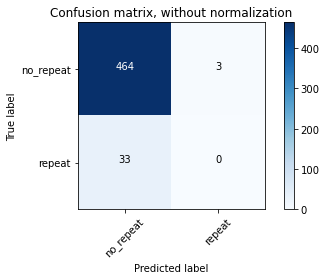

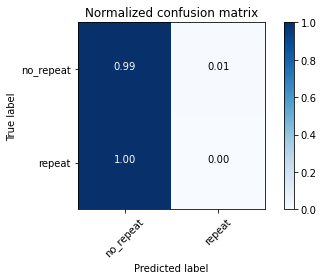

In [18]:
# 混淆矩阵可视化
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

class_names = ['no_repeat', 'repeat']

X_train, X_test, y_train, y_test = train_test_split(train,
                                                    target,
                                                    random_state=0)

clf = RandomForestClassifier(n_jobs=-1)
y_pred = clf.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,
                 format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=class_names,
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [19]:
# 不同的分类模型
# 逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.926

In [20]:
# 不同的分类模型
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
clf.score(X_test, y_test)

0.93

In [21]:

# 不同的分类模型
# 高斯贝叶斯
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = GaussianNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.424

In [22]:
# 不同的分类模型
# 决策树
from sklearn import tree
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.872

In [23]:
# 不同的分类模型
# Bagging based on KNN
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.934

In [24]:
# 不同的分类模型
# 随机森林
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.924

In [25]:
# 不同的分类模型
# 极端森林
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.92

In [26]:
# 不同的分类模型
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.934

In [27]:
# 不同的分类模型
# GBDT
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

clf = GradientBoostingClassifier(n_estimators=10, max_depth=1, learning_rate=1, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.926

In [28]:
# 集成学习
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)
y = target

clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ("rf", clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ["LogisticRegression", "Random Forest", "naive Bayes", "Ensemble"]):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Accuracy: 0.93 (+/- 0.01) [LogisticRegression]
Accuracy: 0.93 (+/- 0.00) [Random Forest]
Accuracy: 0.46 (+/- 0.01) [naive Bayes]


C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Accuracy: 0.93 (+/- 0.01) [Ensemble]


C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
import lightgbm
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

clf = lightgbm
train_matrix = clf.Dataset(X_train, label=y_train)
test_matrix = clf.Dataset(X_test, label=y_test)
params = {
    'boosting_type': "gbdt",
    "objective": "multiclass",
    "metric": "multi_logloss",
    "min_child_weight": 1.5,
    "num_leaves": 2**5,
    "lambda_l2": 10,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "colsample_bylevel": 0.7,
    "learning_rate": 0.03,
    "tree_method": "exact",
    "seed": 2017,
    "num_class": 2,
    "silent": True
}

num_round = 10000
early_stopping_rounds = 100
model = clf.train(params, train_matrix, num_round, valid_sets=test_matrix,early_stopping_rounds=early_stopping_rounds)

pre = model.predict(X_valid, num_iteration=model.best_iteration)
print("score: ", np.mean((pre[:, 1]>0.5)==y_valid))

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6016
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 122
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Start training from score -0.060989
[LightGBM] [Info] Start training from score -2.827397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\lightgbm\basic.py:1077: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


In [32]:
import xgboost
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

clf = xgboost
train_matrix = clf.DMatrix(X_train, label=y_train, missing=-1)
test_matrix = clf.DMatrix(X_test, label=y_test, missing=-1)
z = clf.DMatrix(X_valid, label=y_valid, missing=-1)
params = {
    'booster': "gbtree",
    "objective": "multi:softprob",
    "eval_metric": "mlogloss",
    "min_child_weight": 1.5,
    "max_depth": 5,
    "lambda": 10,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "colsample_bylevel": 0.7,
    "eta": 0.03,
    "tree_method": "exact",
    "seed": 2017,
    "num_class": 2,
}

num_round = 10000
early_stopping_rounds = 100
watch_list = [(train_matrix, 'train'), (test_matrix, "eval")]
model = clf.train(params, train_matrix, num_boost_round=num_round, evals=watch_list, early_stopping_rounds=early_stopping_rounds)

pre = model.predict(z, ntree_limit=model.best_ntree_limit)
print("score: ", np.mean((pre[:, 1]>0.5)==y_valid))

[0]	train-mlogloss:0.67042	eval-mlogloss:0.67256
[1]	train-mlogloss:0.64903	eval-mlogloss:0.65327
[2]	train-mlogloss:0.62886	eval-mlogloss:0.63508
[3]	train-mlogloss:0.60968	eval-mlogloss:0.61801
[4]	train-mlogloss:0.59154	eval-mlogloss:0.60201
[5]	train-mlogloss:0.57448	eval-mlogloss:0.58678
[6]	train-mlogloss:0.55833	eval-mlogloss:0.57224
[7]	train-mlogloss:0.54294	eval-mlogloss:0.55847
[8]	train-mlogloss:0.52843	eval-mlogloss:0.54546
[9]	train-mlogloss:0.51440	eval-mlogloss:0.53335
[10]	train-mlogloss:0.50108	eval-mlogloss:0.52186
[11]	train-mlogloss:0.48822	eval-mlogloss:0.51080
[12]	train-mlogloss:0.47621	eval-mlogloss:0.50038
[13]	train-mlogloss:0.46477	eval-mlogloss:0.49041
[14]	train-mlogloss:0.45372	eval-mlogloss:0.48111
[15]	train-mlogloss:0.44329	eval-mlogloss:0.47243
[16]	train-mlogloss:0.43316	eval-mlogloss:0.46389
[17]	train-mlogloss:0.42346	eval-mlogloss:0.45569
[18]	train-mlogloss:0.41441	eval-mlogloss:0.44818
[19]	train-mlogloss:0.40549	eval-mlogloss:0.44089
[20]	train

In [40]:
class SBBTree():
    """
        SBBTree
        Stacking,Bootstap,Bagging
    """
    def __init__(
                    self,
                    params,
                    stacking_num,
                    bagging_num,
                    bagging_test_size,
                    num_boost_round,
                    early_stopping_rounds
                ):
        """
            Initializes the SBBTree.
            Args:
              params : lgb params.
              stacking_num : k_flod stacking.
              bagging_num : bootstrap num.
              bagging_test_size : bootstrap sample rate.
              num_boost_round : boost num.
              early_stopping_rounds : early_stopping_rounds.
        """
        self.params = params
        self.stacking_num = stacking_num
        self.bagging_num = bagging_num
        self.bagging_test_size = bagging_test_size
        self.num_boost_round = num_boost_round
        self.early_stopping_rounds = early_stopping_rounds

        self.model = lgb
        self.stacking_model = []
        self.bagging_model = []

    def fit(self, X, y):
        """ fit model. """
        if self.stacking_num > 1:
            layer_train = np.zeros((X.shape[0], 2))
            self.SK = StratifiedKFold(n_splits=self.stacking_num, shuffle=True, random_state=1)
            for k,(train_index, test_index) in enumerate(self.SK.split(X, y)):
                X_train = X[train_index]
                y_train = y[train_index]
                X_test = X[test_index]
                y_test = y[test_index]

                lgb_train = lgb.Dataset(X_train, y_train)
                lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

                gbm = lgb.train(self.params,
                            lgb_train,
                            num_boost_round=self.num_boost_round,
                            valid_sets=lgb_eval,
                            early_stopping_rounds=self.early_stopping_rounds)

                self.stacking_model.append(gbm)

                pred_y = gbm.predict(X_test, num_iteration=gbm.best_iteration)
                layer_train[test_index, 1] = pred_y

            X = np.hstack((X, layer_train[:,1].reshape((-1,1))))
        else:
            pass
        for bn in range(self.bagging_num):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.bagging_test_size, random_state=bn)

            lgb_train = lgb.Dataset(X_train, y_train)
            lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

            gbm = lgb.train(self.params,
                        lgb_train,
                        num_boost_round=10000,
                        valid_sets=lgb_eval,
                        early_stopping_rounds=200)

            self.bagging_model.append(gbm)

    def predict(self, X_pred):
        """ predict test data. """
        if self.stacking_num > 1:
            test_pred = np.zeros((X_pred.shape[0], self.stacking_num))
            for sn,gbm in enumerate(self.stacking_model):
                pred = gbm.predict(X_pred, num_iteration=gbm.best_iteration)
                test_pred[:, sn] = pred
            X_pred = np.hstack((X_pred, test_pred.mean(axis=1).reshape((-1,1))))
        else:
            pass
        for bn,gbm in enumerate(self.bagging_model):
            pred = gbm.predict(X_pred, num_iteration=gbm.best_iteration)
            if bn == 0:
                pred_out=pred
            else:
                pred_out+=pred
        return pred_out/self.bagging_num

In [42]:
from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_gaussian_quantiles
from sklearn import metrics
from sklearn.metrics import f1_score

# X, y = make_classification(n_samples=1000, n_features=25, n_clusters_per_class=1,
#                            n_informative=15, random_state=1)
X, y = make_gaussian_quantiles(mean=None,
                               cov=1.0,
                               n_samples=1000,
                               n_features=50,
                               n_classes=2,
                               shuffle=True,
                               random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 9,
    'learning_rate': 0.03,
    "feature_fraction_seed": 2,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "min_data": 20,
    "min_hessian": 1,
    "verbose": -1,
    "silent": 0
}

# test 1
model = SBBTree(params=params,
                stacking_num=2,
                bagging_num=1,
                bagging_test_size=0.33,
                num_boost_round=10000,
                early_stopping_rounds=200)
model.fit(X, y)
X_pred = X[0].reshape((1, -1))
pred = model.predict(X_pred)
print("pred")
print(pred)
print("TEST 1 OK")

# test 1
model = SBBTree(params=params,
                stacking_num=1,
                bagging_num=1,
                bagging_test_size=0.33,
                num_boost_round=10000,
                early_stopping_rounds=200)
model.fit(X_train, y_train)
pred1 = model.predict(X_test)

# test 2
model = SBBTree(params=params,
                stacking_num=1,
                bagging_num=3,
                bagging_test_size=0.33,
                num_boost_round=10000,
                early_stopping_rounds=200)
model.fit(X_train, y_train)
pred2 = model.predict(X_test)

# test 3
model = SBBTree(params=params,
                stacking_num=5,
                bagging_num=1,
                bagging_test_size=0.33,
                num_boost_round=10000,
                early_stopping_rounds=200)
model.fit(X_train, y_train)
pred3 = model.predict(X_test)

# test 4
model = SBBTree(params=params,
                stacking_num=5,
                bagging_num=3,
                bagging_test_size=0.33,
                num_boost_round=10000,
                early_stopping_rounds=200)
model.fit(X_train, y_train)
pred4 = model.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test+1, pred1, pos_label=2)
print("auc: ", metrics.auc(fpr, tpr))

fpr, tpr, threshold = metrics.roc_curve(y_test+1, pred2, pos_label=2)
print("auc: ", metrics.auc(fpr, tpr))

fpr, tpr, threshold = metrics.roc_curve(y_test+1, pred3, pos_label=2)
print("auc: ", metrics.auc(fpr, tpr))

fpr, tpr, threshold = metrics.roc_curve(y_test+1, pred4, pos_label=2)
print("auc: ", metrics.auc(fpr, tpr))

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\lightgbm\basic.py:1077: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.596296
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.590672
[3]	valid_0's auc: 0.604024
[4]	valid_0's auc: 0.601944
[5]	valid_0's auc: 0.600328
[6]	valid_0's auc: 0.605528
[7]	valid_0's auc: 0.602752
[8]	valid_0's auc: 0.602128
[9]	valid_0's auc: 0.603008
[10]	valid_0's auc: 0.599808
[11]	valid_0's auc: 0.606144
[12]	valid_0's auc: 0.613048
[13]	valid_0's auc: 0.61704
[14]	valid_0's auc: 0.613536
[15]	valid_0's auc: 0.615736
[16]	valid_0's auc: 0.618096
[17]	valid_0's auc: 0.623376
[18]	valid_0's auc: 0.622992
[19]	valid_0's auc: 0.624112
[20]	valid_0's auc: 0.62256
[21]	valid_0's auc: 0.624368
[22]	valid_0's auc: 0.625728
[23]	valid_0's auc: 0.624672
[24]	valid_0's auc: 0.622464
[25]	valid_0's auc: 0.622816
[26]	valid_0's auc: 0.625328
[27]	valid_0's auc: 0.623872
[28]	valid_0's auc: 0.624656
[29]	valid_0's auc: 0.6212
[30]	valid_0's auc: 0.619584
[31]	valid_0's auc: 0.622384
[32]	

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\lightgbm\basic.py:1077: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


[286]	valid_0's auc: 0.814939
[287]	valid_0's auc: 0.813378
[288]	valid_0's auc: 0.813155
[289]	valid_0's auc: 0.811817
[290]	valid_0's auc: 0.81204
[291]	valid_0's auc: 0.811148
[292]	valid_0's auc: 0.810925
[293]	valid_0's auc: 0.810479
[294]	valid_0's auc: 0.813378
[295]	valid_0's auc: 0.814493
[296]	valid_0's auc: 0.812486
[297]	valid_0's auc: 0.811148
[298]	valid_0's auc: 0.811148
[299]	valid_0's auc: 0.811817
[300]	valid_0's auc: 0.81204
[301]	valid_0's auc: 0.810033
[302]	valid_0's auc: 0.812709
[303]	valid_0's auc: 0.811817
[304]	valid_0's auc: 0.812263
[305]	valid_0's auc: 0.810479
[306]	valid_0's auc: 0.810925
[307]	valid_0's auc: 0.81204
[308]	valid_0's auc: 0.811817
[309]	valid_0's auc: 0.810925
[310]	valid_0's auc: 0.814047
[311]	valid_0's auc: 0.812709
[312]	valid_0's auc: 0.811594
[313]	valid_0's auc: 0.810702
[314]	valid_0's auc: 0.81204
[315]	valid_0's auc: 0.812486
[316]	valid_0's auc: 0.814047
[317]	valid_0's auc: 0.814493
[318]	valid_0's auc: 0.81427
[319]	valid_0's

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\lightgbm\basic.py:1077: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


[143]	valid_0's auc: 0.779487
[144]	valid_0's auc: 0.782163
[145]	valid_0's auc: 0.783278
[146]	valid_0's auc: 0.783946
[147]	valid_0's auc: 0.785061
[148]	valid_0's auc: 0.785061
[149]	valid_0's auc: 0.786622
[150]	valid_0's auc: 0.785284
[151]	valid_0's auc: 0.787514
[152]	valid_0's auc: 0.79019
[153]	valid_0's auc: 0.792642
[154]	valid_0's auc: 0.792865
[155]	valid_0's auc: 0.792642
[156]	valid_0's auc: 0.793757
[157]	valid_0's auc: 0.79175
[158]	valid_0's auc: 0.791973
[159]	valid_0's auc: 0.789298
[160]	valid_0's auc: 0.79019
[161]	valid_0's auc: 0.789298
[162]	valid_0's auc: 0.788629
[163]	valid_0's auc: 0.788406
[164]	valid_0's auc: 0.787068
[165]	valid_0's auc: 0.784392
[166]	valid_0's auc: 0.78796
[167]	valid_0's auc: 0.789298
[168]	valid_0's auc: 0.789521
[169]	valid_0's auc: 0.791081
[170]	valid_0's auc: 0.79019
[171]	valid_0's auc: 0.790858
[172]	valid_0's auc: 0.791973
[173]	valid_0's auc: 0.794203
[174]	valid_0's auc: 0.792642
[175]	valid_0's auc: 0.794203
[176]	valid_0's

In [45]:
train_data = pd.read_csv("data/train_all.csv", nrows=10000)
test_data = pd.read_csv("data/test_all.csv", nrows=100)
test_data = test_data.fillna(0)

In [46]:
features_columns = [col for col in train_data.columns if col not in ['user_id', "label"]]
train = train_data[features_columns].values
test = test_data[features_columns].values
target = train_data['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    train, target, test_size=0.4, random_state=0
)

model = SBBTree(params=params,
                stacking_num=5,
                bagging_num=3,
                bagging_test_size=0.33,
                num_boost_round=10000,
                early_stopping_rounds=200)
model.fit(X_train, y_train)
pred4 = model.predict(X_test)

pred = model.predict(test)
df_out = pd.DataFrame()
df_out['user_id'] = test_data['user_id'].astype(int)
df_out['predict_prob'] = pred
df_out.head()

C:\InstallSoft\Anaconda\envs\MachineLearning\lib\site-packages\lightgbm\basic.py:1077: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.448957
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.446587
[3]	valid_0's auc: 0.510272
[4]	valid_0's auc: 0.457807
[5]	valid_0's auc: 0.410556
[6]	valid_0's auc: 0.395386
[7]	valid_0's auc: 0.378161
[8]	valid_0's auc: 0.372155
[9]	valid_0's auc: 0.362358
[10]	valid_0's auc: 0.413085
[11]	valid_0's auc: 0.412927
[12]	valid_0's auc: 0.412769
[13]	valid_0's auc: 0.422882
[14]	valid_0's auc: 0.417826
[15]	valid_0's auc: 0.420038
[16]	valid_0's auc: 0.430784
[17]	valid_0's auc: 0.441688
[18]	valid_0's auc: 0.443268
[19]	valid_0's auc: 0.44074
[20]	valid_0's auc: 0.442952
[21]	valid_0's auc: 0.4439
[22]	valid_0's auc: 0.448009
[23]	valid_0's auc: 0.456542
[24]	valid_0's auc: 0.457174
[25]	valid_0's auc: 0.450695
[26]	valid_0's auc: 0.439633
[27]	valid_0's auc: 0.432048
[28]	valid_0's auc: 0.42952
[29]	valid_0's auc: 0.427939
[30]	valid_0's auc: 0.426359
[31]	valid_0's auc: 0.424463
[32]	

,user_id,predict_prob
0,0,0.040242
1,0,0.040299
2,0,0.040367
3,0,0.040239
4,0,0.044402


In [47]:
df_out.to_csv('data/df_out.csv',header=True,index=False)
print('save OK!')

save OK!
